In [1]:
import numpy as np
import os
import tensorflow as tf
import cv2

In [2]:
train_human_dir=os.path.join("/home/abhijan/Downloads/new/human")
train_animal_dir=os.path.join("/home/abhijan/Downloads/new/animal")
train_nature_dir=os.path.join("/home/abhijan/Downloads/new/nature")

test_human_dir=os.path.join("/home/abhijan/Downloads/new_test/human")
test_animal_dir=os.path.join("/home/abhijan/Downloads/new_test/animal")
test_nature_dir=os.path.join("/home/abhijan/Downloads/new_test/nature")

In [3]:
human_name=os.listdir(train_human_dir)
print(human_name[:5])
nature_name=os.listdir(train_nature_dir)
print(nature_name[:5])
animal_name=os.listdir(train_animal_dir)
print(animal_name[:5])


['human8.jpg', 'human7.jpg', 'human9.jpg', 'human14.jpg', 'human2.jpg']
['nature15.jpg', 'nature13.jpg', 'nature5.jpg', 'nature6.jpg', 'nature2.jpg']
['animal14.jpg', 'animal12.jpg', 'animal15.jpg', 'animal4.jpg', 'animal9.jpg']


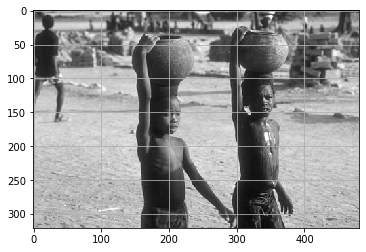

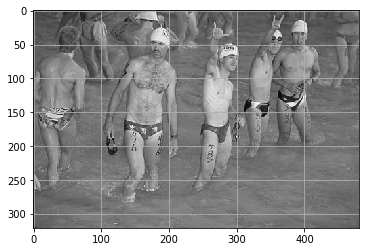

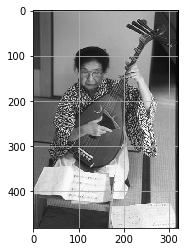

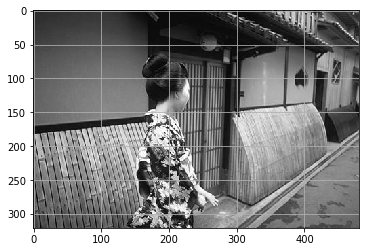

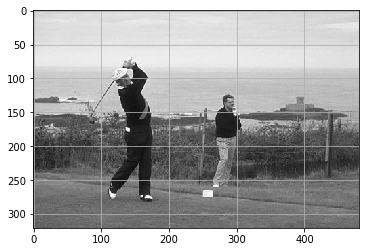

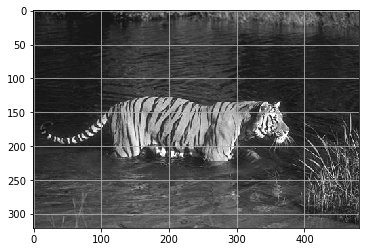

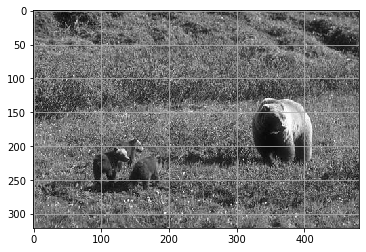

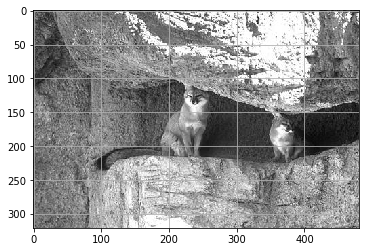

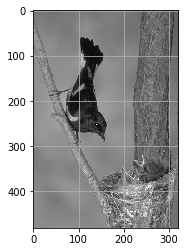

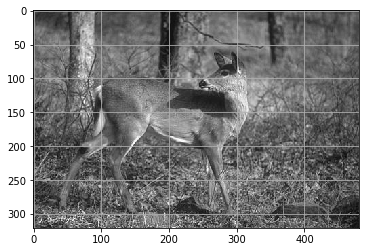

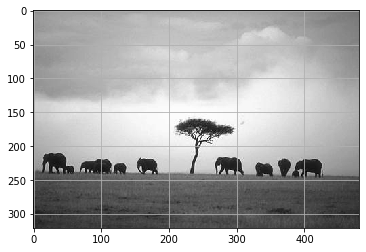

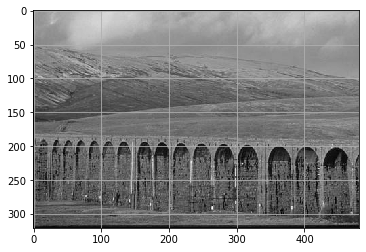

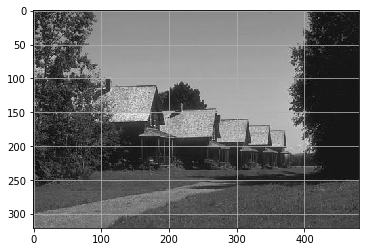

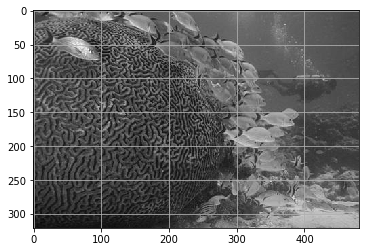

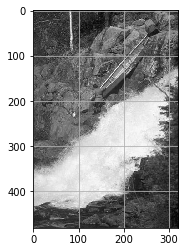

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mping

for i in range(5):
    plt.gray()
    plt.grid(True)
    i=plt.imread("/home/abhijan/Downloads/new/human/"+human_name[i])
    plt.imshow(i)
    plt.show()
for i in range(5):
    plt.gray()
    plt.grid(True)
    i=plt.imread("/home/abhijan/Downloads/new/animal/"+animal_name[i])
    plt.imshow(i)
    plt.show()
for i in range(5):
    plt.gray()
    plt.grid(True)
    i=plt.imread("/home/abhijan/Downloads/new/nature/"+nature_name[i])
    plt.imshow(i)
    plt.show()

In [5]:
input_size=150

model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(input_size,input_size,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax')
])


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9248)              0

In [7]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['acc'])

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1/255)

train_generator=train_datagen.flow_from_directory(
                "/home/abhijan/Downloads/new",
                target_size=(input_size,input_size),
                batch_size=8,
                class_mode='binary'
)
test_generator=test_datagen.flow_from_directory(
                "/home/abhijan/Downloads/new_test",
                target_size=(input_size,input_size),
                batch_size=8,
                class_mode='binary'
)

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [11]:
history=model.fit_generator(
    train_generator,
    steps_per_epoch=40,
    epochs=10,
    validation_data=test_generator,
    validation_steps=45)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
40/40 [==============================] - 10s 247ms/step - loss: 1.1774 - acc: 0.4735 - val_loss: 1.1639 - val_acc: 0.3757
Epoch 2/10
40/40 [==============================] - 9s 230ms/step - loss: 0.2555 - acc: 0.9398 - val_loss: 2.6186 - val_acc: 0.3047
Epoch 3/10
40/40 [==============================] - 9s 232ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 3.6723 - val_acc: 0.2544
Epoch 4/10
40/40 [==============================] - 10s 239ms/step - loss: 1.8844e-04 - acc: 1.0000 - val_loss: 3.7235 - val_acc: 0.3343
Epoch 5/10
40/40 [==============================] - 10s 244ms/step - loss: 1.0933e-04 - acc: 1.0000 - val_loss: 4.1413 - val_acc: 0.3195
Epoch 6/10
40/40 [==============================] - 10s 250ms/step - loss: 8.3649e-05 - acc: 1.0000 - val_loss: 4.2353 - val_acc: 0.2692
Epoch 7/10
40/40 [==============================] - 10s 251ms/step - loss: 6.4696e-05 - acc: 1.0000 - val_loss: 4.20

/home/abhijan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


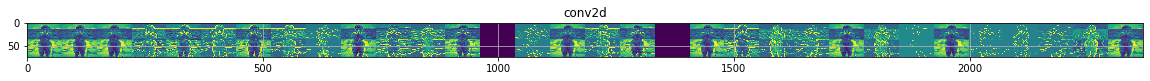

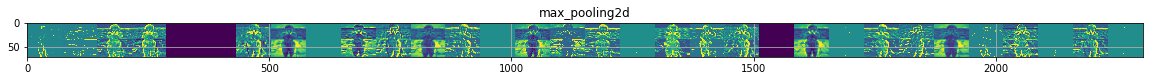

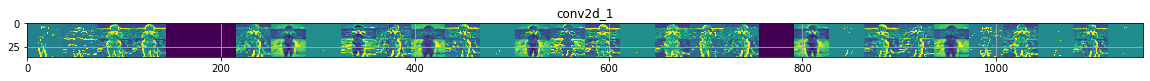

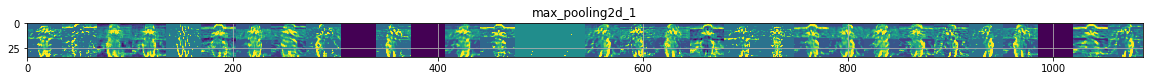

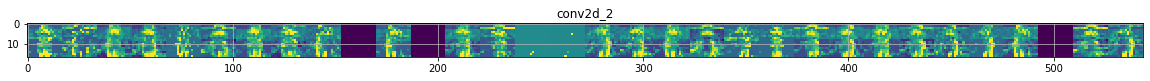

In [12]:
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
successive_output=[layer.output for layer in model.layers[1:]]
visualization_model=tf.keras.models.Model(inputs=model.input,outputs=successive_output)

human_image_file=[os.path.join(train_human_dir,f) for f in human_name]
nature_image_file=[os.path.join(train_nature_dir,f) for f in nature_name]
animal_image_file=[os.path.join(train_animal_dir,f) for f in animal_name]

img_path=random.choice(animal_image_file+nature_image_file+human_image_file)

img=load_img(img_path,target_size=(input_size,input_size))
x=img_to_array(img)
x=x.reshape((1,)+x.shape)
x/=255
successive_feature_map=visualization_model.predict(x)
layer_names=[layer.name for layer in model.layers]

for layer_name,feature_map in zip(layer_names,successive_feature_map):
    if len(feature_map.shape)==4:
        n_features=feature_map.shape[-1]
        size=feature_map.shape[1]
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            x=feature_map[0,:,:,i]
            x-=x.mean()
            x/=x.std()
            x*=64
            x+=128
            x=np.clip(x,0,255).astype('uint8')
            display_grid[:,i*size:(i+1)*size]=x
        scale=20./n_features
        plt.figure(figsize=(scale*n_features,scale))
        plt.title(layer_name)
        plt.grid(True)
        plt.imshow(display_grid,aspect='auto',cmap='viridis')

In [13]:
import numpy as np
from PIL import Image
from keras.preprocessing import image

img1 = image.load_img('/home/abhijan/Downloads/WhatsApp Image 2020-06-02 at 14.14.31.jpeg', target_size=(150, 150))
x = image.img_to_array(img1)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])



Using TensorFlow backend.


[1. 0. 0.]


##### video=cv2.VideoCapture("/home/abhijan/Downloads/horse2.mp4")
while(True):
    cap,frame=video.read()
    cv2.imshow("Capturing Image",frame)
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
            
video.release()
cv2.destroyAllWindows()